In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from classes.randomized_coordinated_attack_sim import CoordinatedAttackSim
import networkx as nx
from random import randint

## general simulation

In [2]:
LINK_FAILURE_PROB = 50  # percent of link failure probability
PROB_FUNC = lambda: randint(1, 100) > LINK_FAILURE_PROB
PROCESS_NUMBER = 3
ROUNDS_NUMBER = 5
DECISION_LIST = [0, 1]
KEY_SELECTOR = 1
# PROCESS_INITIAL_VALUES =  [1] * PROCESS_NUMBER # worst case
# DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS = False # for continuously having worst case
PROCESS_INITIAL_VALUES = None
DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS = True  # for continuously having worst case
SIMULATION_NUMBER = 1000
GROUP_SIMULATION_NUMBER = 10
FIXED_KEY = None
FIG_SIZE = (15, 7)
FIG_SIZE_LITTLE = (6, 6)

In [3]:
graph = nx.complete_graph(PROCESS_NUMBER)

sim = CoordinatedAttackSim(process_count=PROCESS_NUMBER, round_num=ROUNDS_NUMBER, simulation_num=SIMULATION_NUMBER,
                           prob_func=PROB_FUNC, differ_initial_val_on_round=DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS,
                           process_initial_vals=PROCESS_INITIAL_VALUES, communication_graph=graph,
                           key_selector=KEY_SELECTOR, decisions_list=DECISION_LIST,
                           base_path=f'result/undirected-graph/complete-graph/prob-{LINK_FAILURE_PROB}%/',
                           fixed_key=FIXED_KEY)

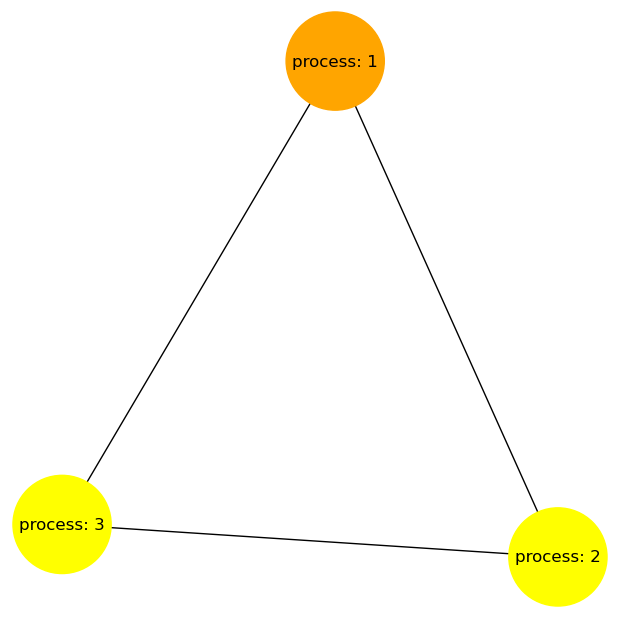

In [4]:
sim.plot_communication_graph(figsize=FIG_SIZE_LITTLE)

In [5]:
df = sim.simulate(log=False)
df.to_csv(f'prob-comp-res/average-case-{PROCESS_NUMBER}-{ROUNDS_NUMBER}.csv')
df

,initial-vals,decisions,info-levels,received-count,failed-count,key,is-correct-answer,reason
0,"[0, 0, 0]","[0, 0, 0]","[2, 1, 2]",16,14,"[5, 5, 5]",True,-
1,"[0, 1, 1]","[0, 0, 0]","[2, 2, 2]",17,13,"[1, 1, 1]",True,-
2,"[1, 1, 1]","[1, 0, 0]","[2, 1, 1]",11,19,"[2, 2, 2]",False,Agreement
3,"[1, 0, 0]","[0, 0, 0]","[2, 2, 2]",13,17,"[2, 2, 2]",True,-
4,"[0, 1, 0]","[0, 0, 0]","[2, 2, 2]",15,15,"[1, 1, 1]",True,-
...,...,...,...,...,...,...,...,...
995,"[0, 1, 0]","[0, 0, 0]","[1, 2, 1]",12,18,"[3, 3, 3]",True,-
996,"[1, 0, 0]","[0, 0, 0]","[3, 3, 2]",14,16,"[5, 5, 5]",True,-
997,"[1, 1, 1]","[0, 0, 0]","[1, 2, 2]",16,14,"[5, 5, 5]",True,-
998,"[1, 1, 0]","[0, 0, 0]","[2, 2, 2]",14,16,"[1, 1, 1]",True,-


In [6]:
sim.get_results_compare(df)

is-correct-answer
False     14
True     986
dtype: int64

In [7]:
sim.get_results_compare(df, col='reason')

reason
-            986
Agreement     14
dtype: int64

## worst case simulation

In [8]:
LINK_FAILURE_PROB = 50  # percent of link failure probability
PROB_FUNC = lambda: randint(1, 100) > LINK_FAILURE_PROB
PROCESS_NUMBER = PROCESS_NUMBER
ROUNDS_NUMBER = 5
DECISION_LIST = [0, 1]
KEY_SELECTOR = 1
PROCESS_INITIAL_VALUES = [1] * PROCESS_NUMBER  # worst case
DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS = False  # for continuously having worst case
SIMULATION_NUMBER = 1000
GROUP_SIMULATION_NUMBER = 10
FIXED_KEY = None

In [9]:
graph = nx.complete_graph(PROCESS_NUMBER)

sim_w = CoordinatedAttackSim(process_count=PROCESS_NUMBER, round_num=ROUNDS_NUMBER, simulation_num=SIMULATION_NUMBER,
                             prob_func=PROB_FUNC,
                             differ_initial_val_on_round=DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS,
                             process_initial_vals=PROCESS_INITIAL_VALUES, communication_graph=graph,
                             key_selector=KEY_SELECTOR, decisions_list=DECISION_LIST,
                             base_path=f'result/undirected-graph/complete-graph/prob-{LINK_FAILURE_PROB}%/',
                             fixed_key=FIXED_KEY)

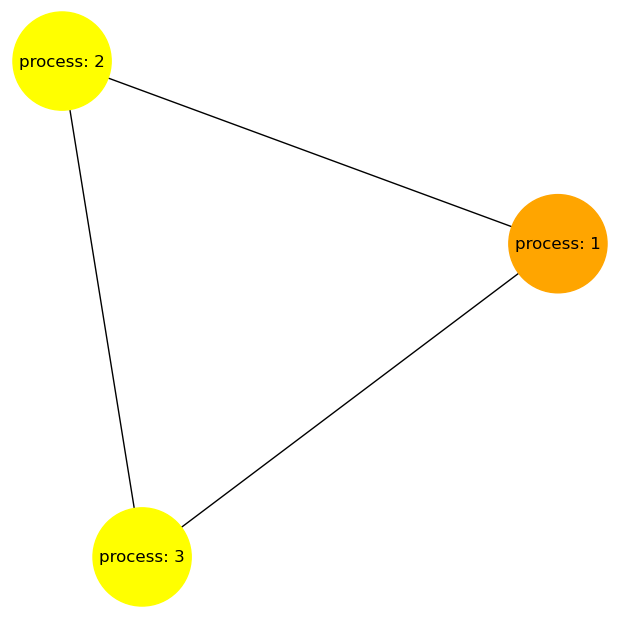

In [10]:
sim_w.plot_communication_graph(figsize=FIG_SIZE_LITTLE)

In [11]:
df_w = sim_w.simulate(log=False)
df_w.to_csv(f'prob-comp-res/worst-case-{PROCESS_NUMBER}-{ROUNDS_NUMBER}.csv')
df_w

,initial-vals,decisions,info-levels,received-count,failed-count,key,is-correct-answer,reason
0,"[1, 1, 1]","[1, 1, 1]","[2, 2, 2]",14,16,"[1, 1, 1]",True,-
1,"[1, 1, 1]","[1, 0, 1]","[2, 1, 2]",15,15,"[2, 2, 2]",False,Agreement
2,"[1, 1, 1]","[1, 1, 1]","[3, 3, 3]",18,12,"[1, 1, 1]",True,-
3,"[1, 1, 1]","[0, 0, 0]","[2, 1, 1]",12,18,"[3, 3, 3]",True,-
4,"[1, 1, 1]","[1, 1, 1]","[2, 2, 3]",16,14,"[1, 1, 1]",True,-
...,...,...,...,...,...,...,...,...
995,"[1, 1, 1]","[0, 0, 0]","[2, 2, 1]",13,17,"[5, 5, 5]",True,-
996,"[1, 1, 1]","[0, 0, 0]","[3, 2, 2]",18,12,"[4, 4, 4]",True,-
997,"[1, 1, 1]","[0, 0, 0]","[2, 2, 2]",16,14,"[4, 4, 4]",True,-
998,"[1, 1, 1]","[0, 1, 1]","[1, 2, 2]",11,19,"[2, 2, 2]",False,Agreement


In [12]:
sim_w.get_results_compare(df_w)

is-correct-answer
False    139
True     861
dtype: int64

In [13]:
sim_w.get_results_compare(df_w, col='reason')

reason
-            861
Agreement    139
dtype: int64

## worst case simulation for same key

In [14]:
LINK_FAILURE_PROB = 50  # percent of link failure probability
PROB_FUNC = lambda: randint(1, 100) > LINK_FAILURE_PROB
PROCESS_NUMBER = PROCESS_NUMBER
ROUNDS_NUMBER = 3
DECISION_LIST = [0, 1]
KEY_SELECTOR = 1
PROCESS_INITIAL_VALUES = [1] * PROCESS_NUMBER  # worst case
DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS = False  # for continuously having worst case
SIMULATION_NUMBER = 100
GROUP_SIMULATION_NUMBER = 10
FIXED_KEY = 2
SIMULATION_FOR_FIXED_KEY = 500

In [15]:
graph = nx.complete_graph(PROCESS_NUMBER)

sim_w_key = CoordinatedAttackSim(process_count=PROCESS_NUMBER, round_num=ROUNDS_NUMBER, simulation_num=SIMULATION_NUMBER,
                             prob_func=PROB_FUNC,
                             differ_initial_val_on_round=DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS,
                             process_initial_vals=PROCESS_INITIAL_VALUES, communication_graph=graph,
                             key_selector=KEY_SELECTOR, decisions_list=DECISION_LIST,
                             base_path=f'result/undirected-graph/complete-graph/prob-{LINK_FAILURE_PROB}%/',
                             fixed_key=FIXED_KEY)

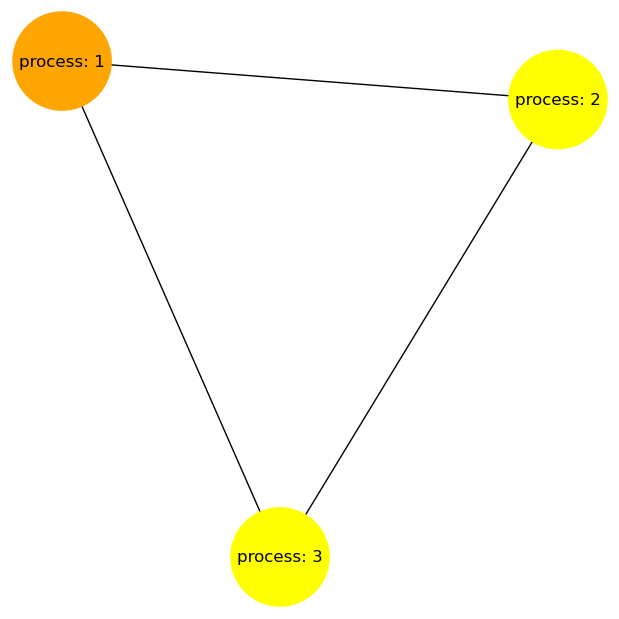

In [16]:
sim_w_key.plot_communication_graph(figsize=FIG_SIZE_LITTLE)

35.482

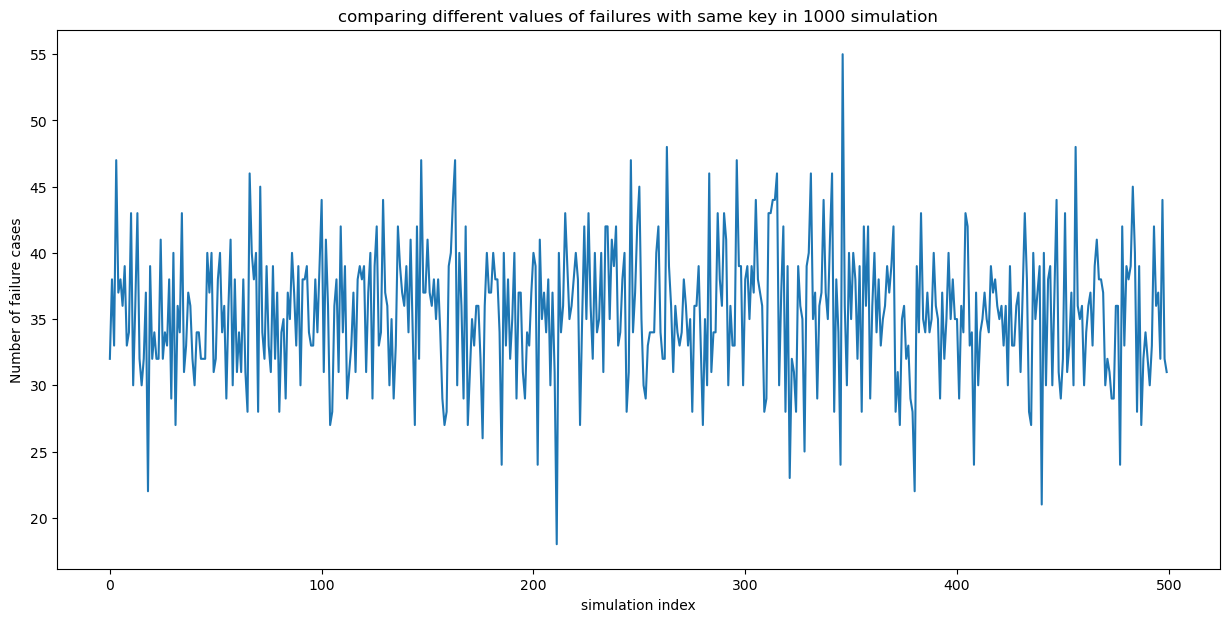

In [17]:
failure_results = []
for i in range(SIMULATION_FOR_FIXED_KEY):
    df_of_key = sim_w_key.simulate(log=False)
    failure_results.append(len(df_of_key[(df_of_key['is-correct-answer'] == str(False))]))
plt.figure(figsize=FIG_SIZE)
plt.plot(failure_results)
plt.ylabel('Number of failure cases')
plt.xlabel('simulation index')
plt.title('comparing different values of failures with same key in 1000 simulation')
plt.savefig('prob-comp-res/comparison-fixed-key.png')
np.mean(failure_results)

## compare different probability state

In [18]:
DECISION_LIST = [0, 1]
KEY_SELECTOR = 1
PROCESS_NUMBER = 3
ROUNDS_NUMBER = 5
PROCESS_INITIAL_VALUES = [1] * PROCESS_NUMBER  # worst case
DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS = False  # for continuously having worst case
SIMULATION_NUMBER = 1000
PROBABILITY_LIST = list(range(0, 101, 5))  # [0, 5, 10, 15, ..., 100]
BEST_RES = [1] * PROCESS_NUMBER
BEST_RES_STR = str(BEST_RES)
FIXED_KEY = None
FIXED_KEY_LIST = None # list(range(1, ROUNDS_NUMBER+1))

In [19]:
right_answer_lens = np.zeros(len(PROBABILITY_LIST))
wrong_answer_lens = np.zeros(len(PROBABILITY_LIST))
best_res_lens = np.zeros(len(PROBABILITY_LIST))

def apply_sim_for_key(key):
    right = []
    wrong = []
    best = []
    for i in range(len(PROBABILITY_LIST)):
        LINK_FAILURE_PROB = PROBABILITY_LIST[i]  # percent of link failure probability
        PROB_FUNC = lambda: randint(1, 100) > LINK_FAILURE_PROB
        simulator = CoordinatedAttackSim(process_count=PROCESS_NUMBER, round_num=ROUNDS_NUMBER,
                                         simulation_num=SIMULATION_NUMBER, prob_func=PROB_FUNC,
                                         differ_initial_val_on_round=DIFFERENT_PROCESS_INITIAL_VALUES_IN_ROUNDS,
                                         process_initial_vals=PROCESS_INITIAL_VALUES, communication_graph=None,
                                         key_selector=KEY_SELECTOR, decisions_list=DECISION_LIST,
                                         base_path=f'result/undirected-graph/complete-graph/prob-{LINK_FAILURE_PROB}%/',
                                         fixed_key=key)
        res_df = simulator.simulate(log=False)
        res_df = res_df.astype({'is-correct-answer':str, 'decisions':str})
    
        right.append(len(res_df[res_df['is-correct-answer'] == str(True)]))
        wrong.append(len(res_df[res_df['is-correct-answer'] == str(False)]))
        best.append(len(res_df[(res_df['is-correct-answer'] == str(True)) & (res_df['decisions'] == BEST_RES_STR)]))
    return np.array(right), np.array(wrong), np.array(best)
    
if FIXED_KEY_LIST is None:
    right_answer_lens, wrong_answer_lens, best_res_lens = apply_sim_for_key(FIXED_KEY)
else:
    for key in FIXED_KEY_LIST:
        right, wrong, best = apply_sim_for_key(key)
        right_answer_lens = right_answer_lens + right
        wrong_answer_lens = wrong_answer_lens + wrong
        best_res_lens = best_res_lens + best

In [20]:
res_df = pd.DataFrame({'right-answer-len': right_answer_lens, 
                       'wrong-answer-len': wrong_answer_lens, 
                       'best-res-len': best_res_lens,
                       'prob': PROBABILITY_LIST})
res_df

,right-answer-len,wrong-answer-len,best-res-len,prob
0,1000,0,1000,0
1,945,55,826,5
2,911,89,684,10
3,888,112,616,15
4,884,116,559,20
5,887,113,535,25
6,881,119,477,30
7,902,98,441,35
8,886,114,395,40
9,891,109,347,45


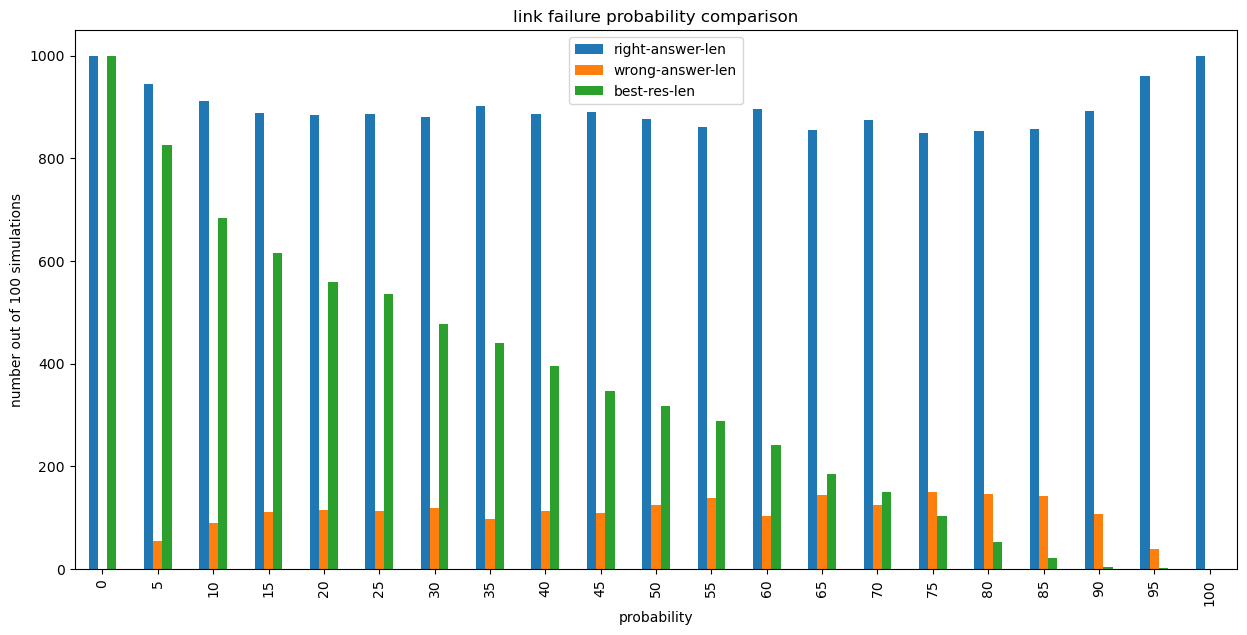

In [21]:
res_df.plot.bar(x='prob', figsize=FIG_SIZE)
plt.xlabel('probability')
plt.ylabel('number out of 100 simulations')
plt.title('link failure probability comparison')
plt.savefig(f'prob-comp-res/probability-comparison-{PROCESS_NUMBER}-{ROUNDS_NUMBER}.png')